RIVERSIDE=RIVERSIDE

BLACK ROCK + GRANT-AMHERST = BLACK ROCK

WEST HERTEL = MILITARY

N PARK = N DELAWARE + N PARK

CENTRAL PARK = STARIN CENTRAL

KENFIELD = KENFIELD

UNIV HEIGHTS + KENSINGTON-BAILEY = UNIV HEIGHTS + KENSINGTON + LASALLE

SENECA-CAZENOVIA = SENECA + CAZENOVIA PARK

HOPKINS TIFFT + S PARK = TIFFT + S PARK + ABBOT + MCKINLEY PARK + S ABOTT


PRATT-WILLERT + FRUIT BELT = WILLERT PARK + MEDICAL PARK

MASTEN PARK = MASTEN PARK + KINGSLEY + COLD SPRING

GENNESSEE MOSELLE + SCHILLER PARK = GENNESSEE MOSELLE + SCHILLER PARK + EMERSON

BROADWAY FILLMORE + LOOVEJOY + SENECA + BABCOCK = EMSLIE + JOHNSON + BROADWAY-FILLMORE + LOVEJOY + BABCOCK + VALLEY

KAISERTOWN = KAISERTOWN

DELEVAN-GRIDER = GRIDER

MLK PARK = MLK PARK

FILLMORE-LEROY = FILLMORE

PARKSIDE = PARKSIDE + PARK MEADOW + DELAWARE PARK

ELMWOOD BIDWELL + ELMWOOD BRYANT + UWS + WS = ALBRIGHT + BRYANT + DELAWARE-W FERRY + STATE HOSPITAL + GRANT-FERRY
                                              + FOREST + FRONT PARK
                                              
ALLENTOWN = ALLEN

LWS = LAKEVIEW + COLUMBUS



1ST WARD + CENTRAL + ELLICOTT = 1ST WARD + PERRY + S ELLICOTT



Want to compare:

gender
age
ethnicity
occupied vs vacant units
\# of units in structure/percentage multi-unit
owner vs renter
\# available vehicle
household/family type
foreign born and education*

can't get language data

buffalorecycles.org

correlation with clean sweeps?

Things to plot:

age in neighborhood vs recycling rates

probably should do a bunch of recycling rates plots


In [13]:
import pandas as pa
import numpy as np
import matplotlib.pyplot as plt
from math import *
import re

In [14]:
df1 = pa.read_csv("Monthly_Recycling_and_Waste_Collection_Statistics.csv", low_memory=False)
df2 = pa.read_csv("Buffalo_Public_Schools.csv", low_memory=False)
df3 = pa.read_csv("Neighborhood_Metrics.csv", low_memory=False)
df4 = pa.read_csv("Neighborhood_Curbside_Recycling_Rates.csv", low_memory=False)

In [15]:
i = 0
aveRates = {}
sum = 0
j = 0
for i in range(624):
    sum += df4['CURBSIDE RECYCLING RATE'][i]
    if i == 623:
        aveRates.update({df4['NEIGHBORHOOD'][i] : sum/j})
        break
    if df4['NEIGHBORHOOD'][i] != df4['NEIGHBORHOOD'][i+1]:
        aveRates.update({df4['NEIGHBORHOOD'][i] : sum/j})
        sum = 0
        j = 0
    i += 1
    j += 1

<BarContainer object of 52 artists>

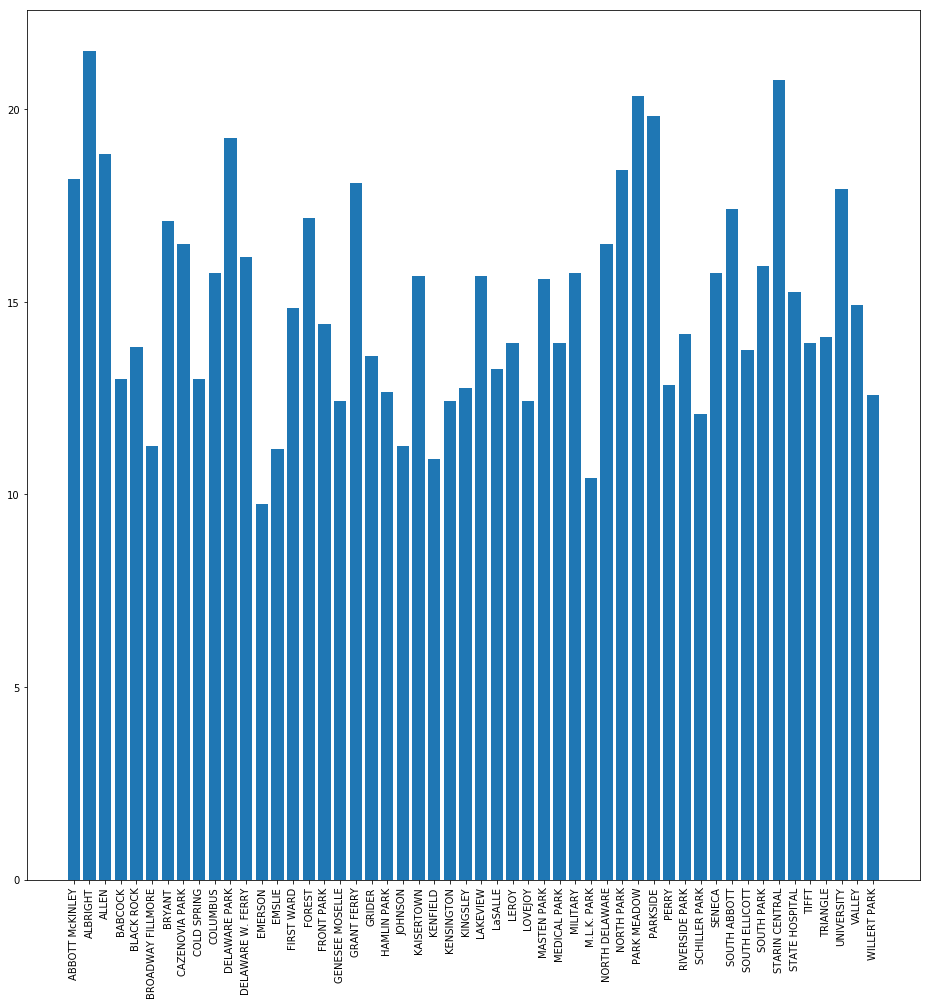

In [16]:
fig = plt.subplots(figsize=(16,16))
plt.xticks(rotation='vertical')
plt.bar(aveRates.keys(),aveRates.values())

<BarContainer object of 52 artists>

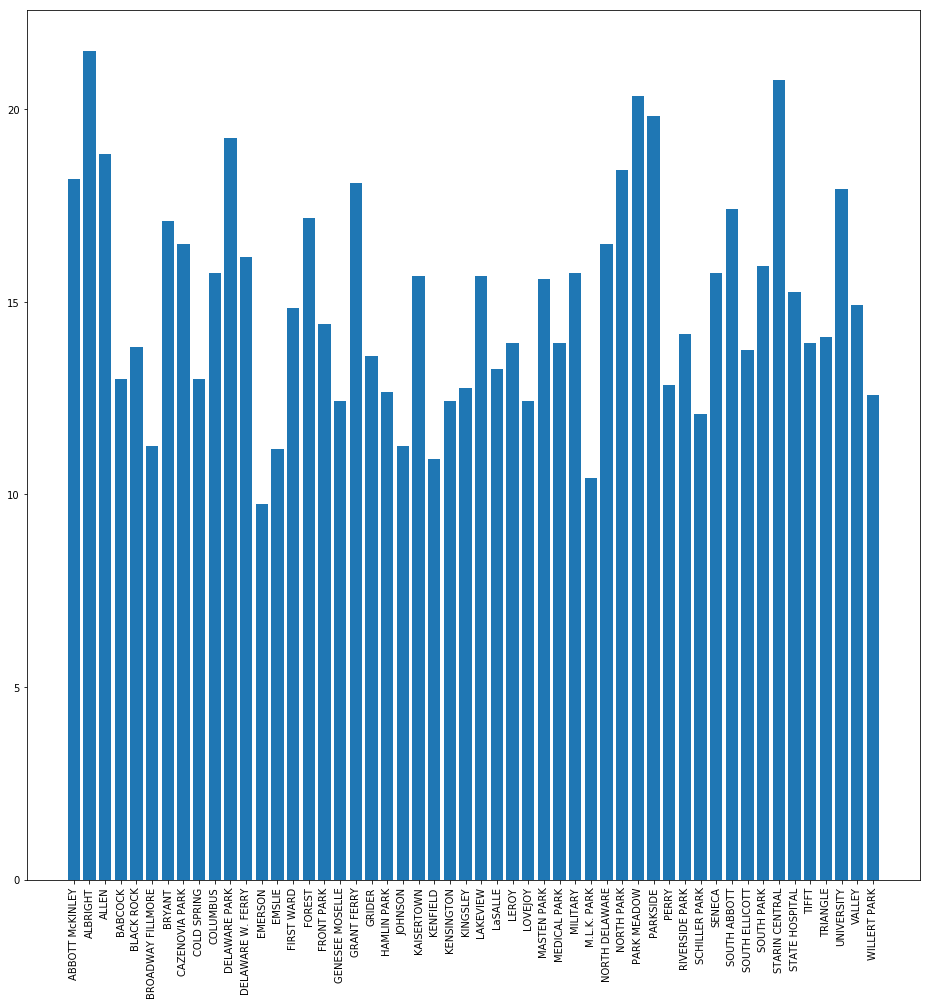

In [17]:
fig = plt.subplots(figsize=(16,16))
plt.xticks(rotation='vertical')
plt.bar(aveRates.keys(),aveRates.values())

In [18]:
# https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
sortedrates = sorted(aveRates.items(), key=lambda x: x[1])

<BarContainer object of 52 artists>

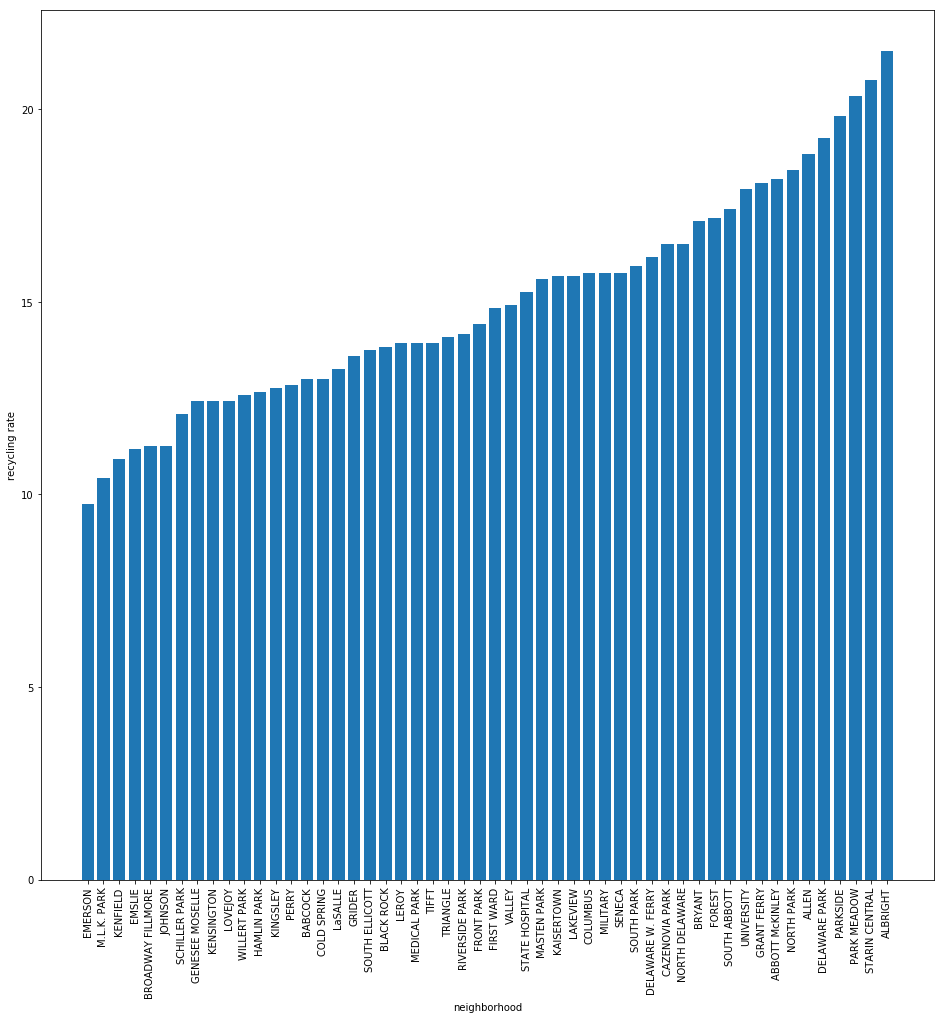

In [19]:
nabes = [x[0] for x in sortedrates]
rates = [x[1] for x in sortedrates]
fig = plt.subplots(figsize=(16,16))
plt.xticks(rotation='vertical')
plt.xlabel('neighborhood')
plt.ylabel('recycling rate')
plt.bar(nabes, rates)

In [20]:
yearlydata = {}
i = 0
while(i < 624):
    yearlydata.update({df4['NEIGHBORHOOD'][i] : df4.iloc[i:i+12].sum()[2:4]})
    i += 12

In [21]:
def nabefuse(*x):
    cr = 0
    cg = 0
    for arg in x:
        cr += arg[0]
        cg += arg[1]
    return cr * 100 / (cr + cg)

In [22]:
def dictupdate(dic, name, rate):
    dic.update({name : rate})

# final dict of combined nabes and rates
a = {}

YD = yearlydata
dictupdate(a, 'ALLENTOWN', nabefuse(yearlydata['ALLEN']))
dictupdate(a, 'RIVERSIDE', nabefuse(yearlydata['RIVERSIDE PARK']))
dictupdate(a, 'BLACK ROCK', nabefuse(yearlydata['BLACK ROCK']))
dictupdate(a, 'WEST HERTEL', nabefuse(yearlydata['MILITARY']))
dictupdate(a, 'NORTH PARK', nabefuse(yearlydata['NORTH DELAWARE'], yearlydata['NORTH PARK']))
dictupdate(a, 'CENTRAL PARK', nabefuse(yearlydata['STARIN CENTRAL']))
dictupdate(a, 'KENFIELD', nabefuse(yearlydata['KENFIELD']))
dictupdate(a, 'UNIVERSITY HIGHTS/KENSINGTON-BAILEY', nabefuse(yearlydata['UNIVERSITY'], YD['KENSINGTON'], YD['LaSALLE']))
dictupdate(a, 'SENECA-CAZENOVIA', nabefuse(YD['SENECA'], YD['CAZENOVIA PARK']))
dictupdate(a, 'HOPKINS TIFFT/SOUTH PARK', nabefuse(YD['TIFFT'], YD['SOUTH PARK'], YD['ABBOTT McKINLEY'], YD['SOUTH ABBOTT']))
dictupdate(a, 'PRATT-WILLERT/FRUIT BELT', nabefuse(YD['WILLERT PARK'], YD['MEDICAL PARK']))
dictupdate(a, 'MASTEN PARK', nabefuse(YD['MASTEN PARK'], YD['KINGSLEY'], YD['COLD SPRING']))
dictupdate(a, 'GENESEE-MOSELLE/SCHILER PARK', nabefuse(YD['GENESEE MOSELLE'], YD['SCHILLER PARK'], YD['EMERSON']))
dictupdate(a, 'BROADWAY-FILLMORE/LOVEJOY/BABCOCK', nabefuse(YD['EMSLIE'], YD['JOHNSON'], YD['BROADWAY FILLMORE'], YD['LOVEJOY'], YD['BABCOCK'], YD['VALLEY']))
dictupdate(a, 'KAISERTOWN', nabefuse(YD['KAISERTOWN']))
dictupdate(a, 'DELEVAN-GRIDER', nabefuse(YD['GRIDER']))
dictupdate(a, 'MLK PARK', nabefuse(YD['M.L.K. PARK']))
dictupdate(a, 'FILLMORE-LEROY', nabefuse(YD['BROADWAY FILLMORE']))
dictupdate(a, 'PARKSIDE', nabefuse(YD['PARKSIDE'], YD['PARK MEADOW'], YD['DELAWARE PARK']))
dictupdate(a, 'ELMWOOD/WEST SIDE', nabefuse(YD['ALBRIGHT'], YD['BRYANT'], YD['DELAWARE W. FERRY'], YD['STATE HOSPITAL'], YD['GRANT FERRY'], YD['FOREST'], YD['FRONT PARK']))
dictupdate(a, 'LOWER WEST SIDE', nabefuse(YD['LAKEVIEW'], YD['COLUMBUS']))
dictupdate(a, '1ST WARD/ELLICOTT', nabefuse(YD['FIRST WARD'], YD['PERRY'], YD['SOUTH ELLICOTT']))
dictupdate(a, 'HAMLIN PARK', nabefuse(YD['HAMLIN PARK']))


<BarContainer object of 23 artists>

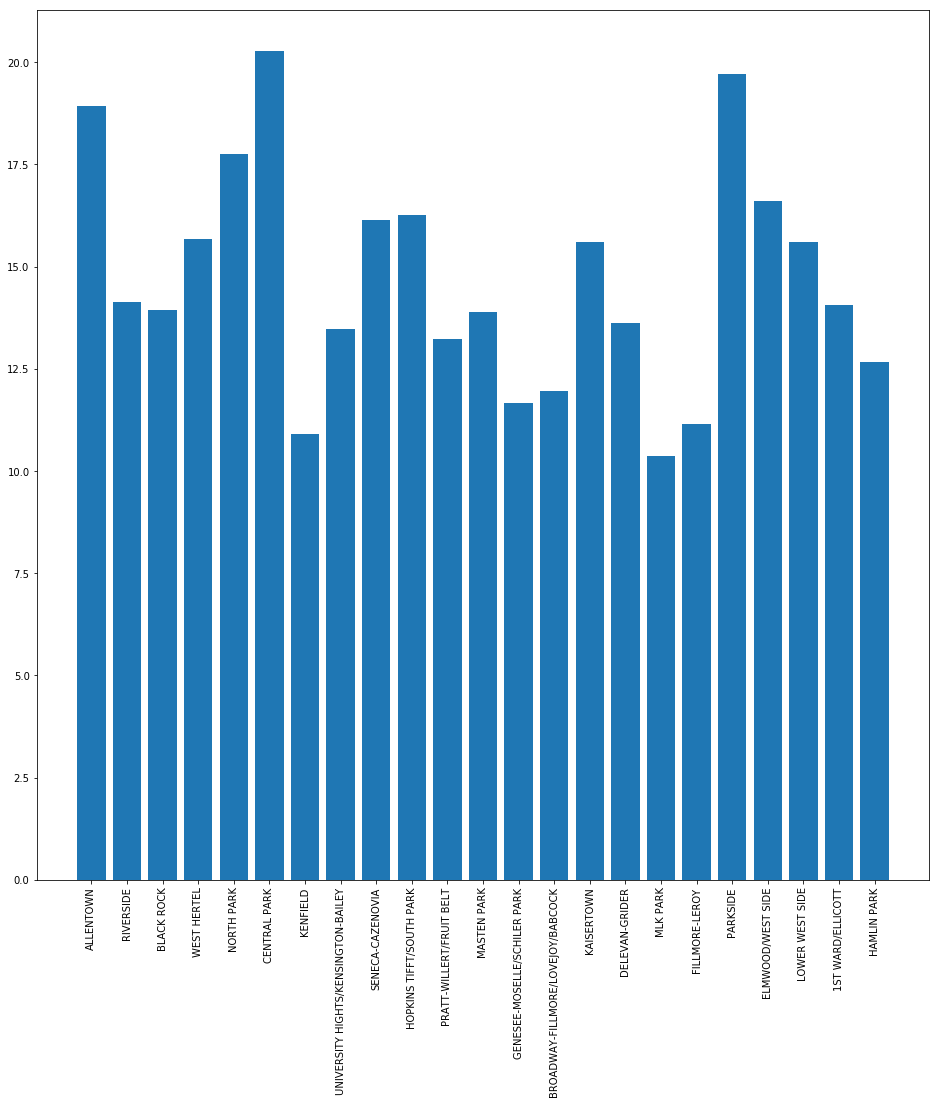

In [23]:
fig = plt.subplots(figsize=(16,16))
plt.xticks(rotation='vertical')
plt.bar(a.keys(),a.values())

In [24]:
def nabefuse2(*x):
    totalpersons = 0
    males = 0
    females = 0
    young = 0
    old = 0
    older = 0
    oldest = 0
    white = 0
    black = 0
    hispanic = 0
    asian = 0
    otherrace = 0
    totoccunits = 0
    numoccunits = 0
    vacant = 0
    othervacant = 0
    totunits = 0
    unit1 = 0
    unit2 = 0
    unitmore = 0
    unitmost = 0
    new = 0
    lessnew = 0
    boomers = 0
    prewar = 0
    owners = 0
    renters = 0
    car0 = 0
    car1 = 0
    carmore = 0
    families = 0
    famkids = 0
    marfamkids = 0
    singles = 0
    foreign = 0
    nohs = 0
    hs = 0
    assocs = 0
    bachelors = 0
    grads = 0
    nonfamilies = 0
    loners = 0
    friends = 0
    for arg in x:
        totalpersons += arg[11]
        males += arg[12]
        females += arg[14]
        young += arg[16]
        old += arg[18]
        older += arg[20]
        oldest += arg[22]
        white += arg[24]
        black += arg[26]
        hispanic += arg[28]
        asian += arg[30]
        otherrace += arg[32]
        totoccunits += arg[34]
        numoccunits += arg[35]
        vacant += arg[37]
        othervacant += arg[39]
        totunits += arg[41]
        unit1 += arg[42]
        unit2 += arg[44]
        unitmore += arg[46]
        unitmost += arg[48]
        new += arg[50]
        lessnew += arg[52]
        boomers += arg[54]
        prewar += arg[56]
        owners += arg[58]
        renters += arg[60]
        car0 += arg[62]
        car1 += arg[64]
        carmore += arg[66]
        families += arg[76]
        famkids += arg[78]
        marfamkids += arg[80]
        singles += arg[82]
        foreign += arg[84]
        nohs += arg[86]
        hs += arg[88]
        assocs += arg[90]
        bachelors += arg[92]
        grads += arg[94]
        nonfamilies += arg[113]
        loners += arg[115]
        friends += arg[117]
    return [totalpersons, males, females, young, old, older, oldest, white, black, hispanic, asian, otherrace, totoccunits, numoccunits, vacant, othervacant, totunits, unit1, unit2, unitmore, unitmost, new, lessnew, boomers, prewar, owners, renters, car0, car1, carmore, families, famkids, marfamkids, singles, foreign, nohs, hs, assocs, bachelors, grads, nonfamilies, loners, friends]

In [27]:
b = {}
df5 = df3.values

dictupdate(b, 'ALLENTOWN', nabefuse2(df5[4]))
dictupdate(b, 'RIVERSIDE', nabefuse2(df5[10]))
dictupdate(b, 'BLACK ROCK', nabefuse2(df5[9], df5[8]))
dictupdate(b, 'WEST HERTEL', nabefuse2(df5[11]))
dictupdate(b, 'NORTH PARK', nabefuse2(df5[12]))
dictupdate(b, 'CENTRAL PARK', nabefuse2(df5[13]))
dictupdate(b, 'KENFIELD', nabefuse2(df5[16]))
dictupdate(b, 'UNIVERSITY HIGHTS/KENSINGTON-BAILEY', nabefuse2(df5[14], df5[15]))
dictupdate(b, 'SENECA-CAZENOVIA', nabefuse2(df5[33]))
dictupdate(b, 'HOPKINS TIFFT/SOUTH PARK', nabefuse2(df5[32], df5[34]))
dictupdate(b, 'PRATT-WILLERT/FRUIT BELT', nabefuse2(df5[25], df5[24]))
dictupdate(b, 'MASTEN PARK', nabefuse2(df5[23]))
dictupdate(b, 'GENESEE-MOSELLE/SCHILER PARK', nabefuse2(df5[18], df5[17]))
dictupdate(b, 'BROADWAY-FILLMORE/LOVEJOY/BABCOCK', nabefuse2(df5[27], df5[28], df5[30]))
dictupdate(b, 'KAISERTOWN', nabefuse2(df5[29]))
dictupdate(b, 'DELEVAN-GRIDER', nabefuse2(df5[20]))
dictupdate(b, 'MLK PARK', nabefuse2(df5[19]))
dictupdate(b, 'FILLMORE-LEROY', nabefuse2(df5[21]))
dictupdate(b, 'PARKSIDE', nabefuse2(df5[7]))
dictupdate(b, 'ELMWOOD/WEST SIDE', nabefuse2(df5[5], df5[6], df5[3], df5[2]))
dictupdate(b, 'LOWER WEST SIDE', nabefuse2(df5[1]))
dictupdate(b, '1ST WARD/ELLICOTT', nabefuse2(df5[31], df5[0], df5[26]))
dictupdate(b, 'HAMLIN PARK', nabefuse2(df5[22]))

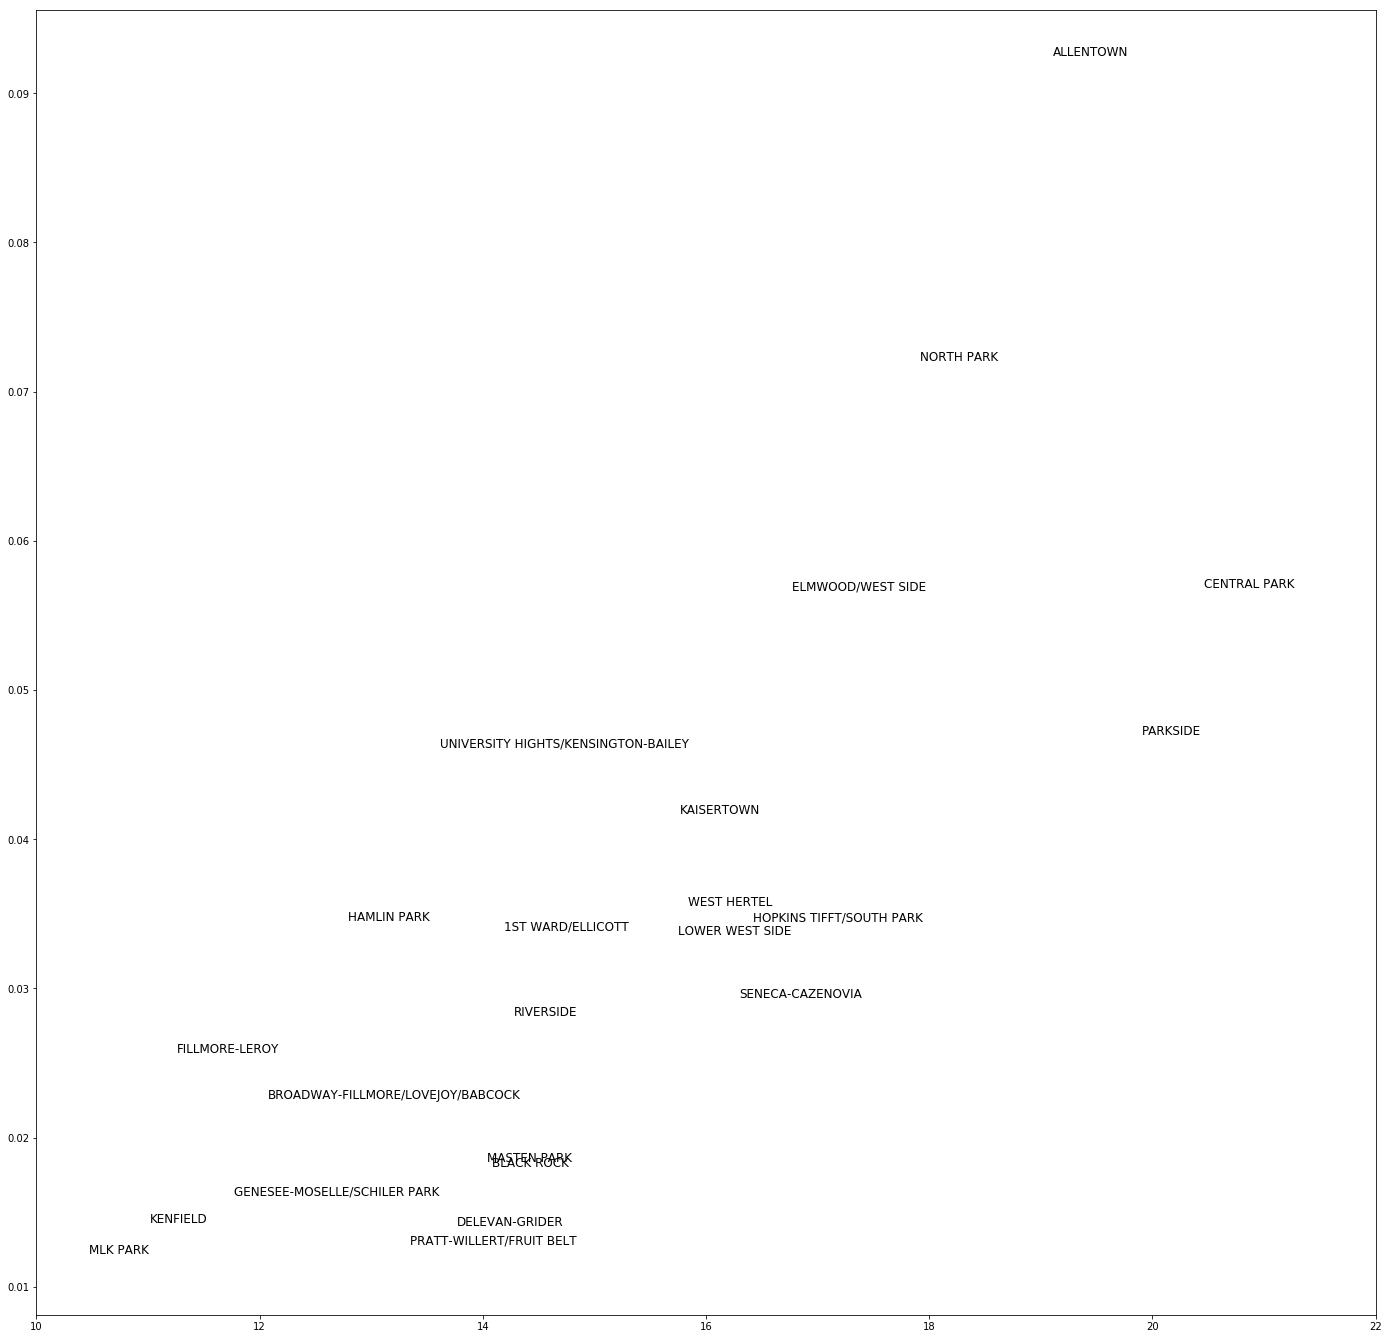

In [28]:
#percent who live with friends
data = []
for row in b.values():
    data.append(row[42]/row[0])
plt.figure(figsize=(24,24))
for i in range(len(a.values())):
    plt.plot(list(a.values())[i], data[i])
    plt.text(list(a.values())[i] * (1 + 0.01), data[i] * (1 + 0.01) , list(a.keys())[i], fontsize=12)
plt.xlim(10,22)
plt.show()

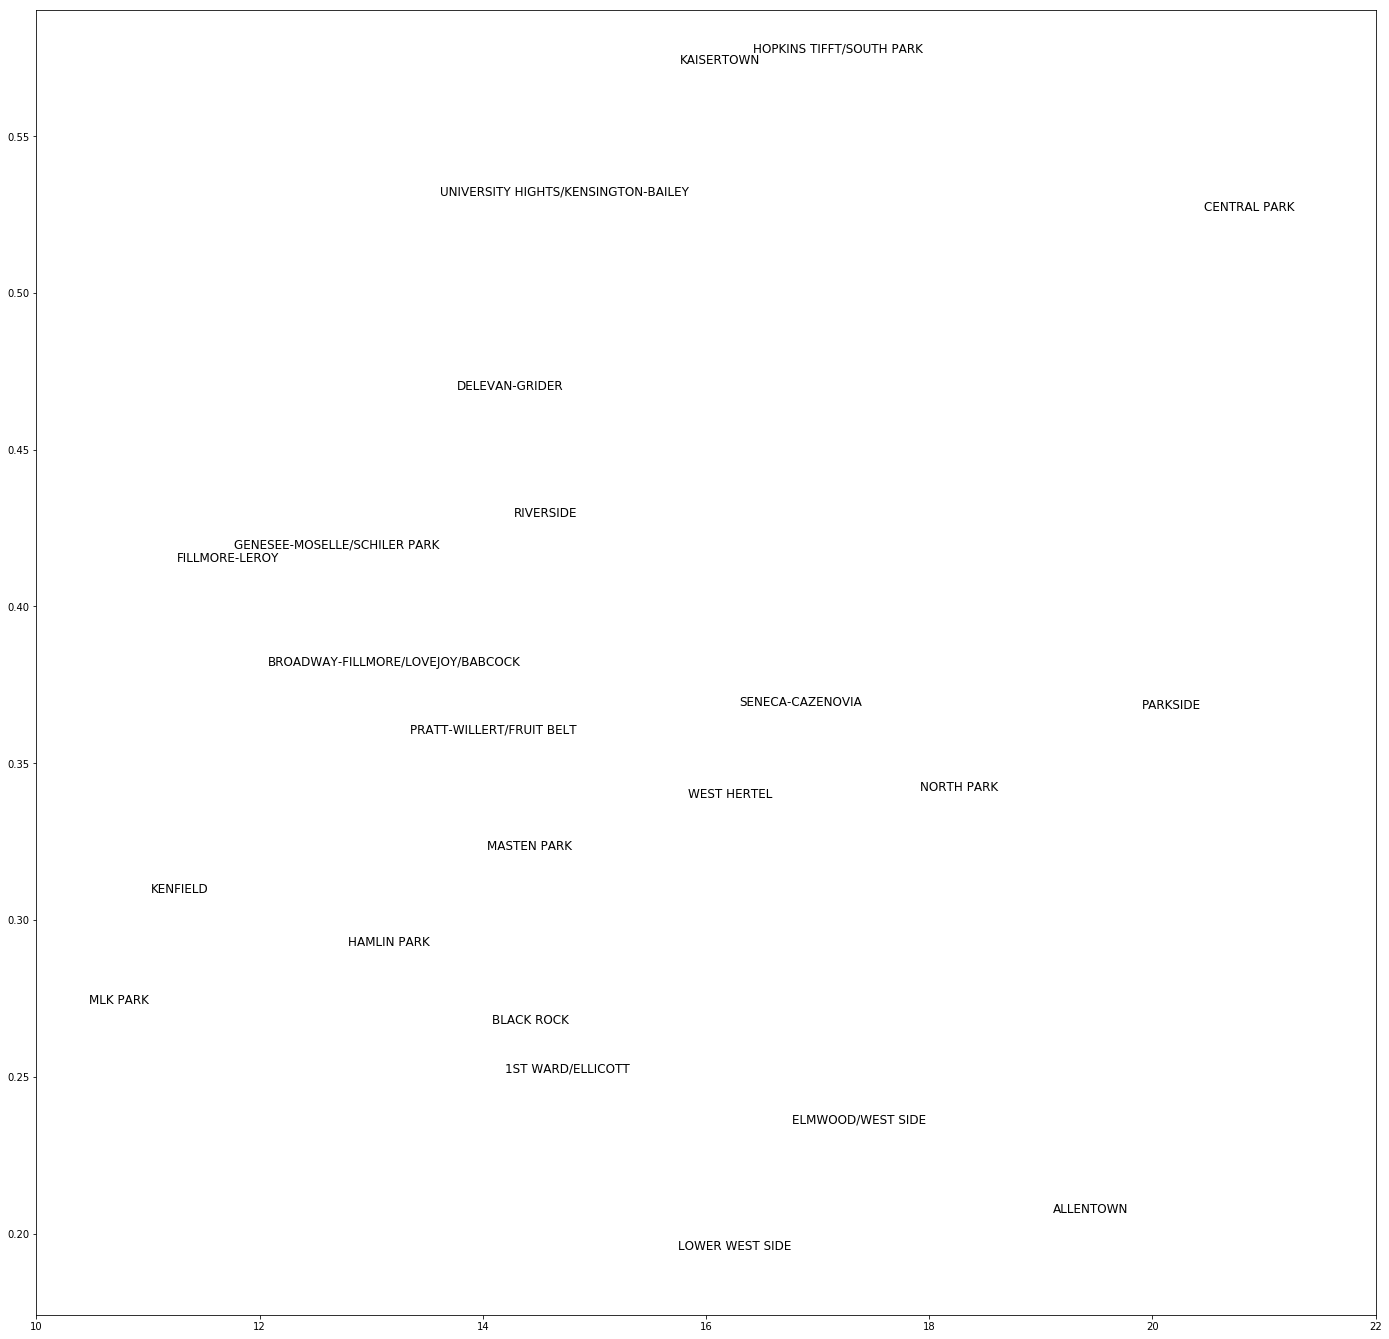

In [29]:
#percent of 1 unit structures
data = []
for row in b.values():
    data.append(row[17]/row[16])
plt.figure(figsize=(24,24))
for i in range(len(a.values())):
    plt.plot(list(a.values())[i], data[i])
    plt.text(list(a.values())[i] * (1 + 0.01), data[i] * (1 + 0.01) , list(a.keys())[i], fontsize=12)
plt.xlim(10,22)
plt.show()

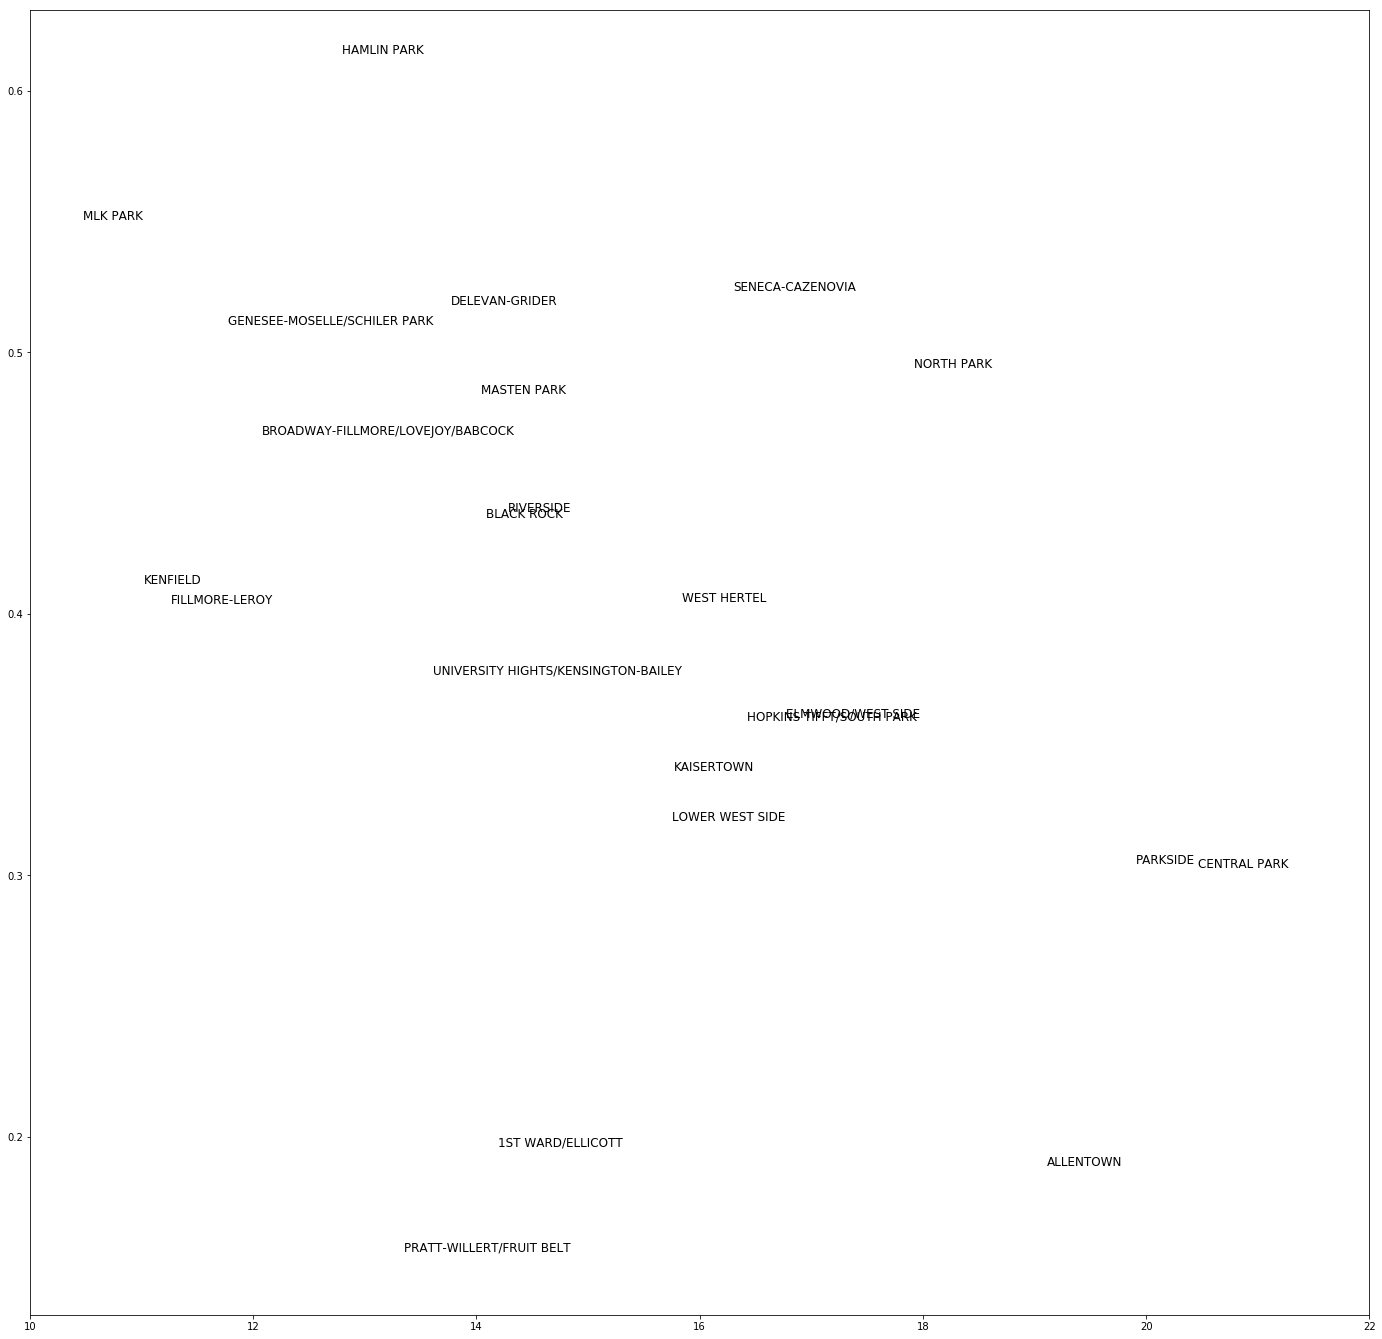

In [30]:
#percent of 2 unit structures
data = []
for row in b.values():
    data.append(row[18]/row[16])
plt.figure(figsize=(24,24))
for i in range(len(a.values())):
    plt.plot(list(a.values())[i], data[i])
    plt.text(list(a.values())[i] * (1 + 0.01), data[i] * (1 + 0.01) , list(a.keys())[i], fontsize=12)
plt.xlim(10,22)
plt.show()

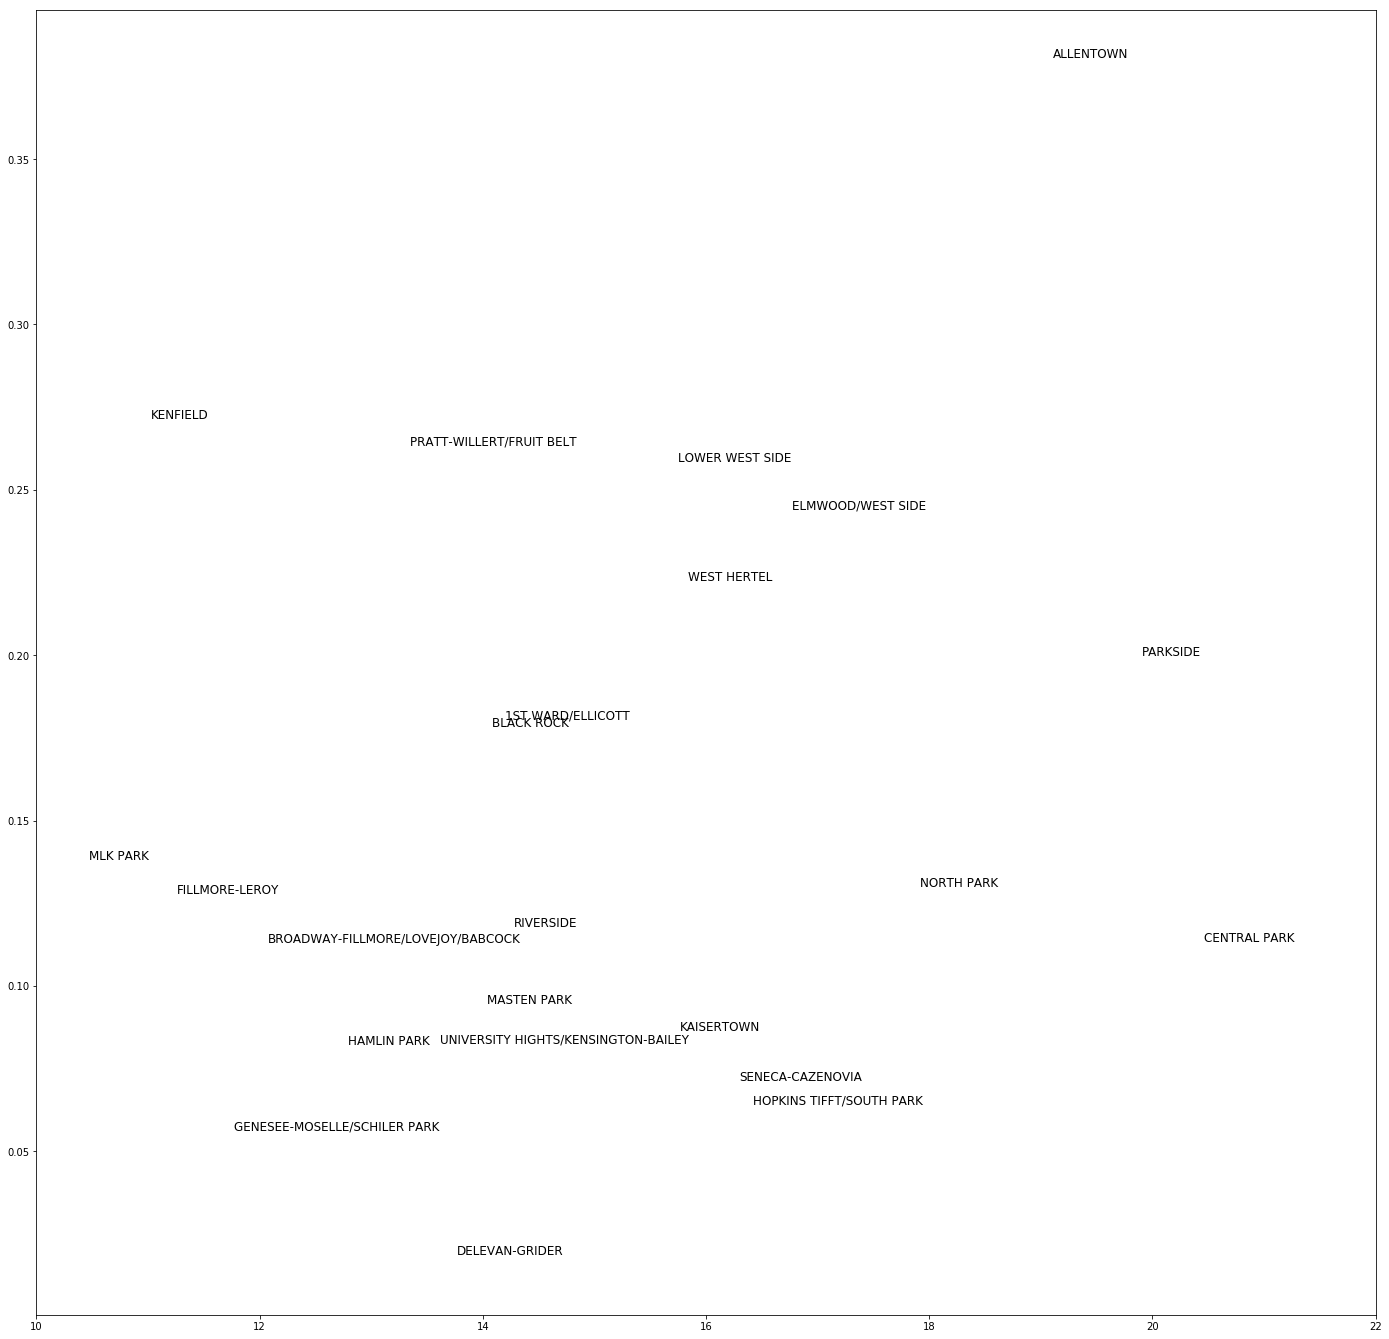

In [31]:
#percent of 3-19 unit structures
data = []
for row in b.values():
    data.append(row[19]/row[16])
plt.figure(figsize=(24,24))
for i in range(len(a.values())):
    plt.plot(list(a.values())[i], data[i])
    plt.text(list(a.values())[i] * (1 + 0.01), data[i] * (1 + 0.01) , list(a.keys())[i], fontsize=12)
plt.xlim(10,22)
plt.show()

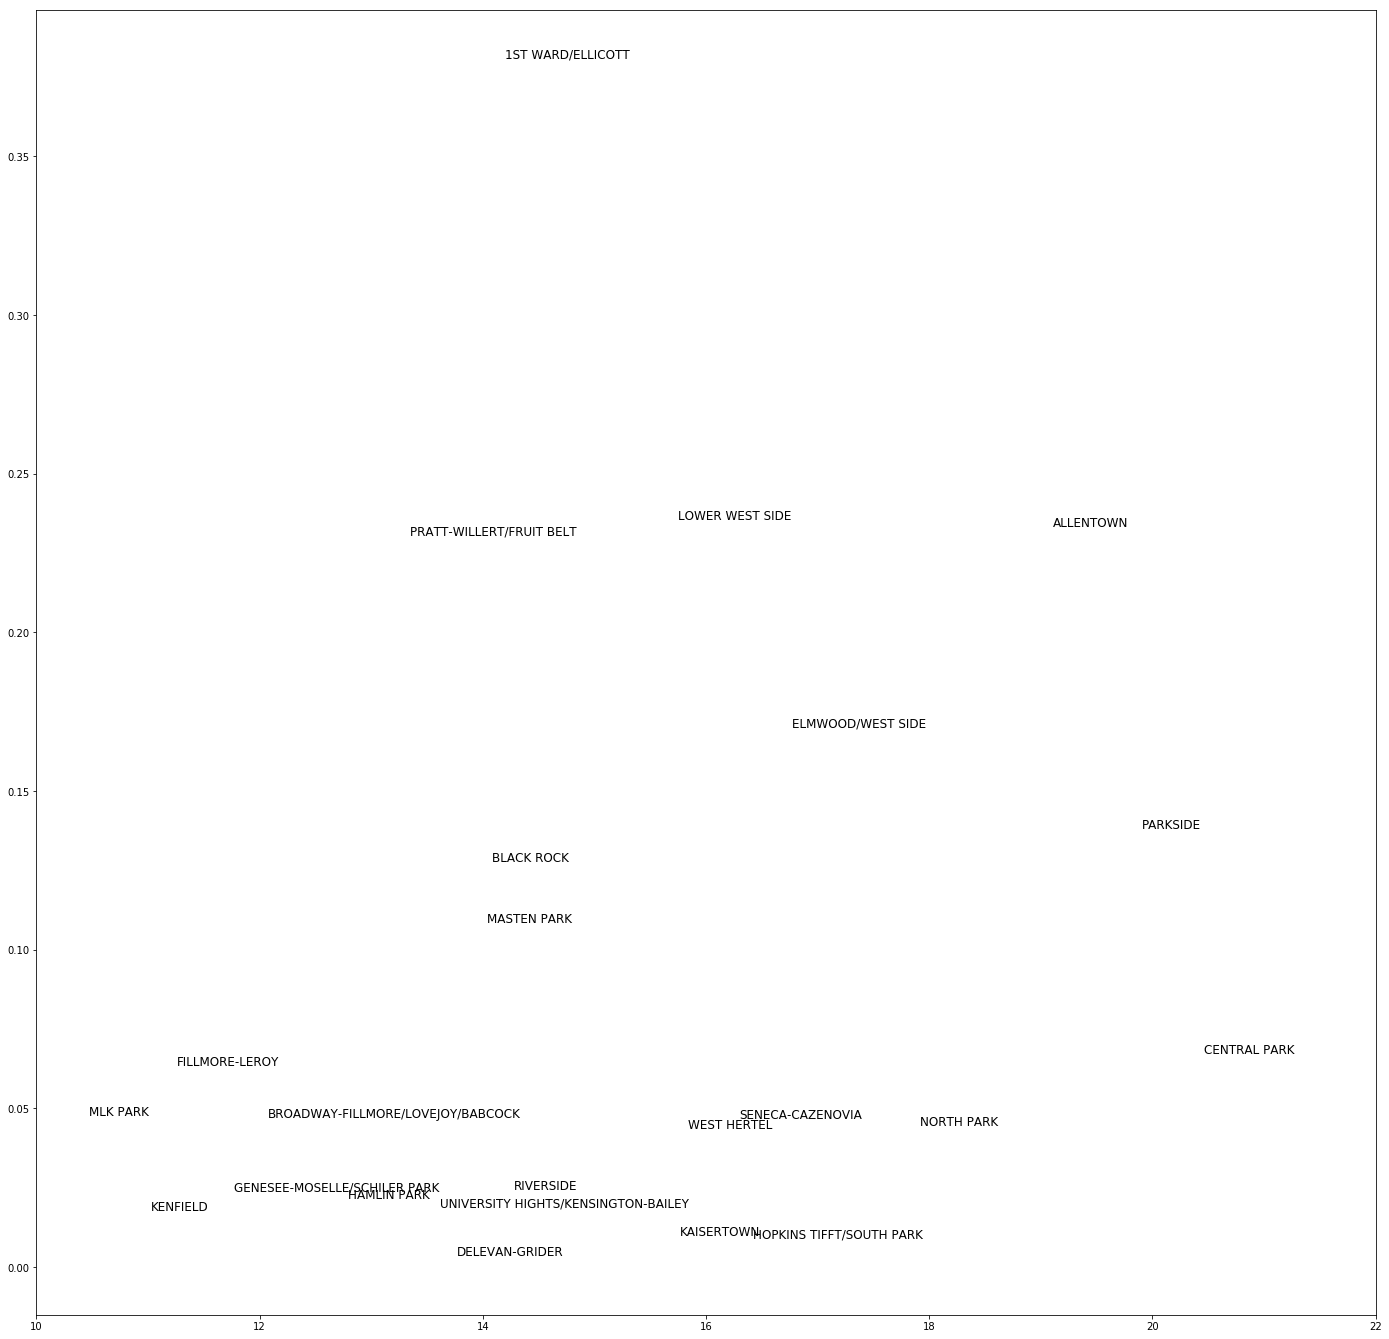

In [32]:
#percent of 20+ unit structures
data = []
for row in b.values():
    data.append(row[20]/row[16])
plt.figure(figsize=(24,24))
for i in range(len(a.values())):
    plt.plot(list(a.values())[i], data[i])
    plt.text(list(a.values())[i] * (1 + 0.01), data[i] * (1 + 0.01) , list(a.keys())[i], fontsize=12)
plt.xlim(10,22)
plt.show()

In [33]:
def scatterbasic(part,whole):
    data = []
    for row in b.values():
        data.append(row[part]/row[whole])
    plt.figure(figsize=(24,24))
    for i in range(len(a.values())):
        plt.plot(list(a.values())[i], data[i])
        plt.text(list(a.values())[i] * (1 + 0.01), data[i] * (1 + 0.01) , list(a.keys())[i], fontsize=12)
    plt.xlim(10,22)
    plt.show()

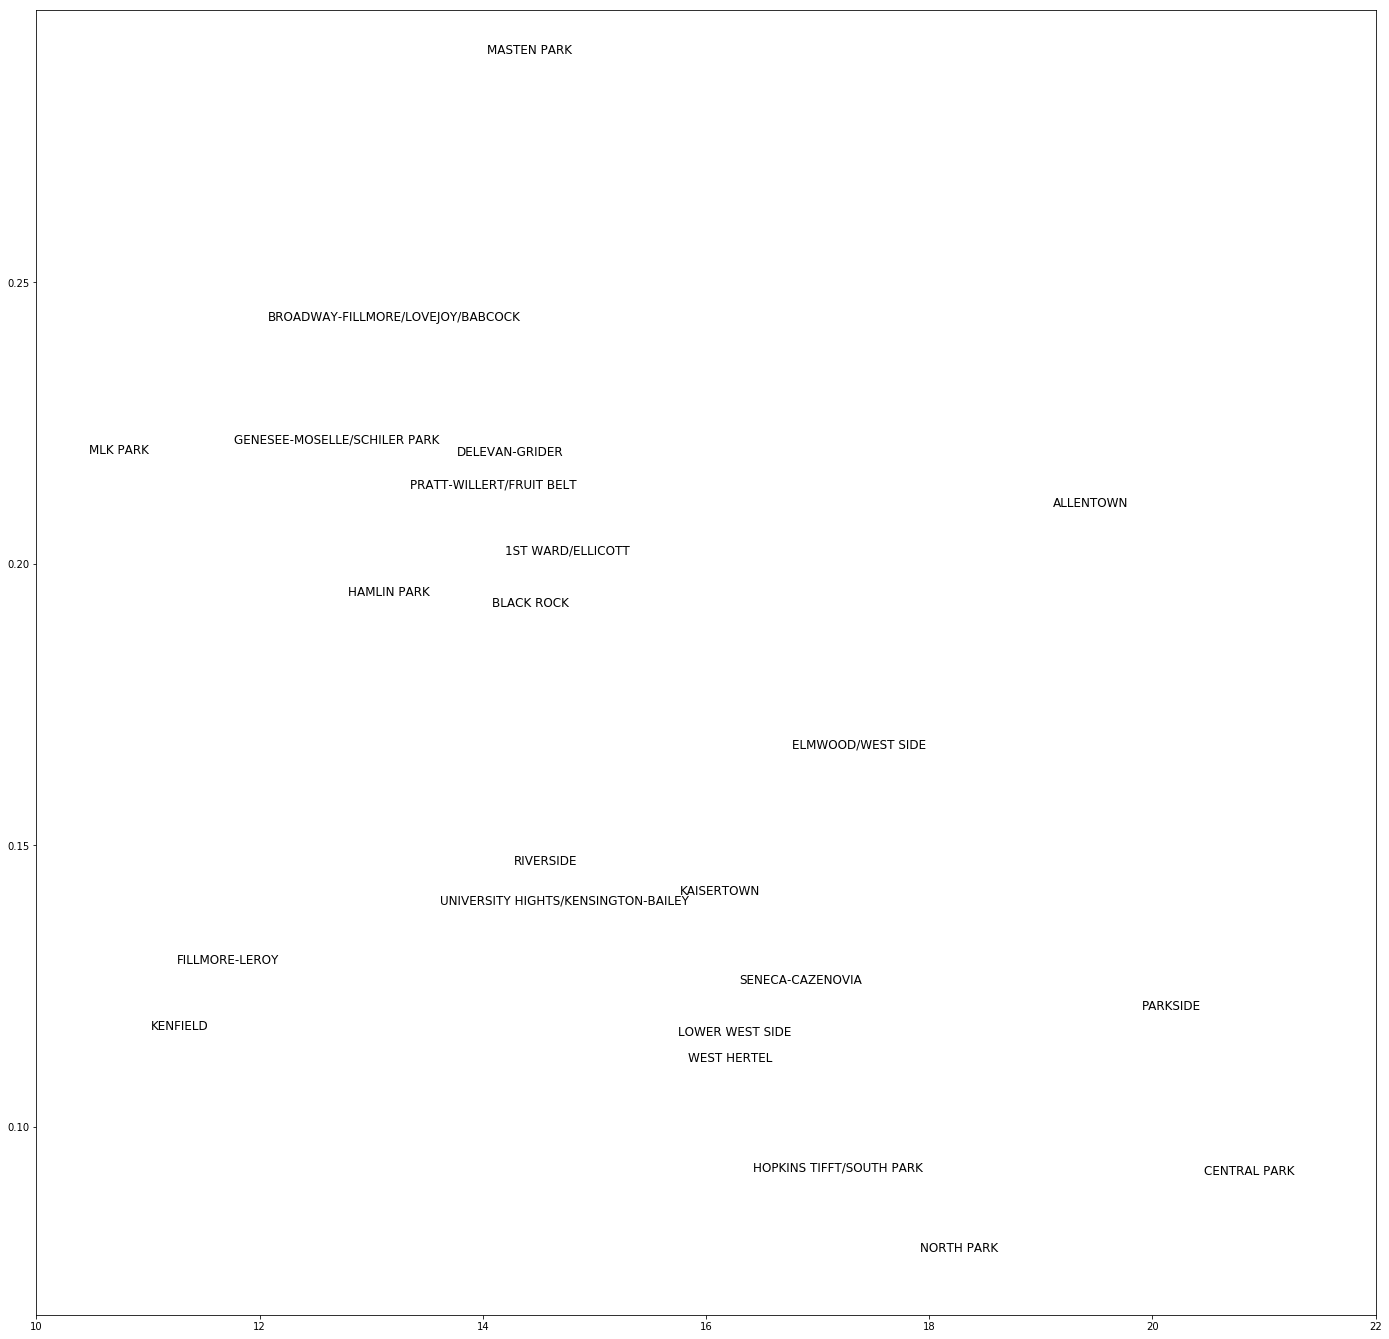

In [34]:
#vacant houses
scatterbasic(14,12)

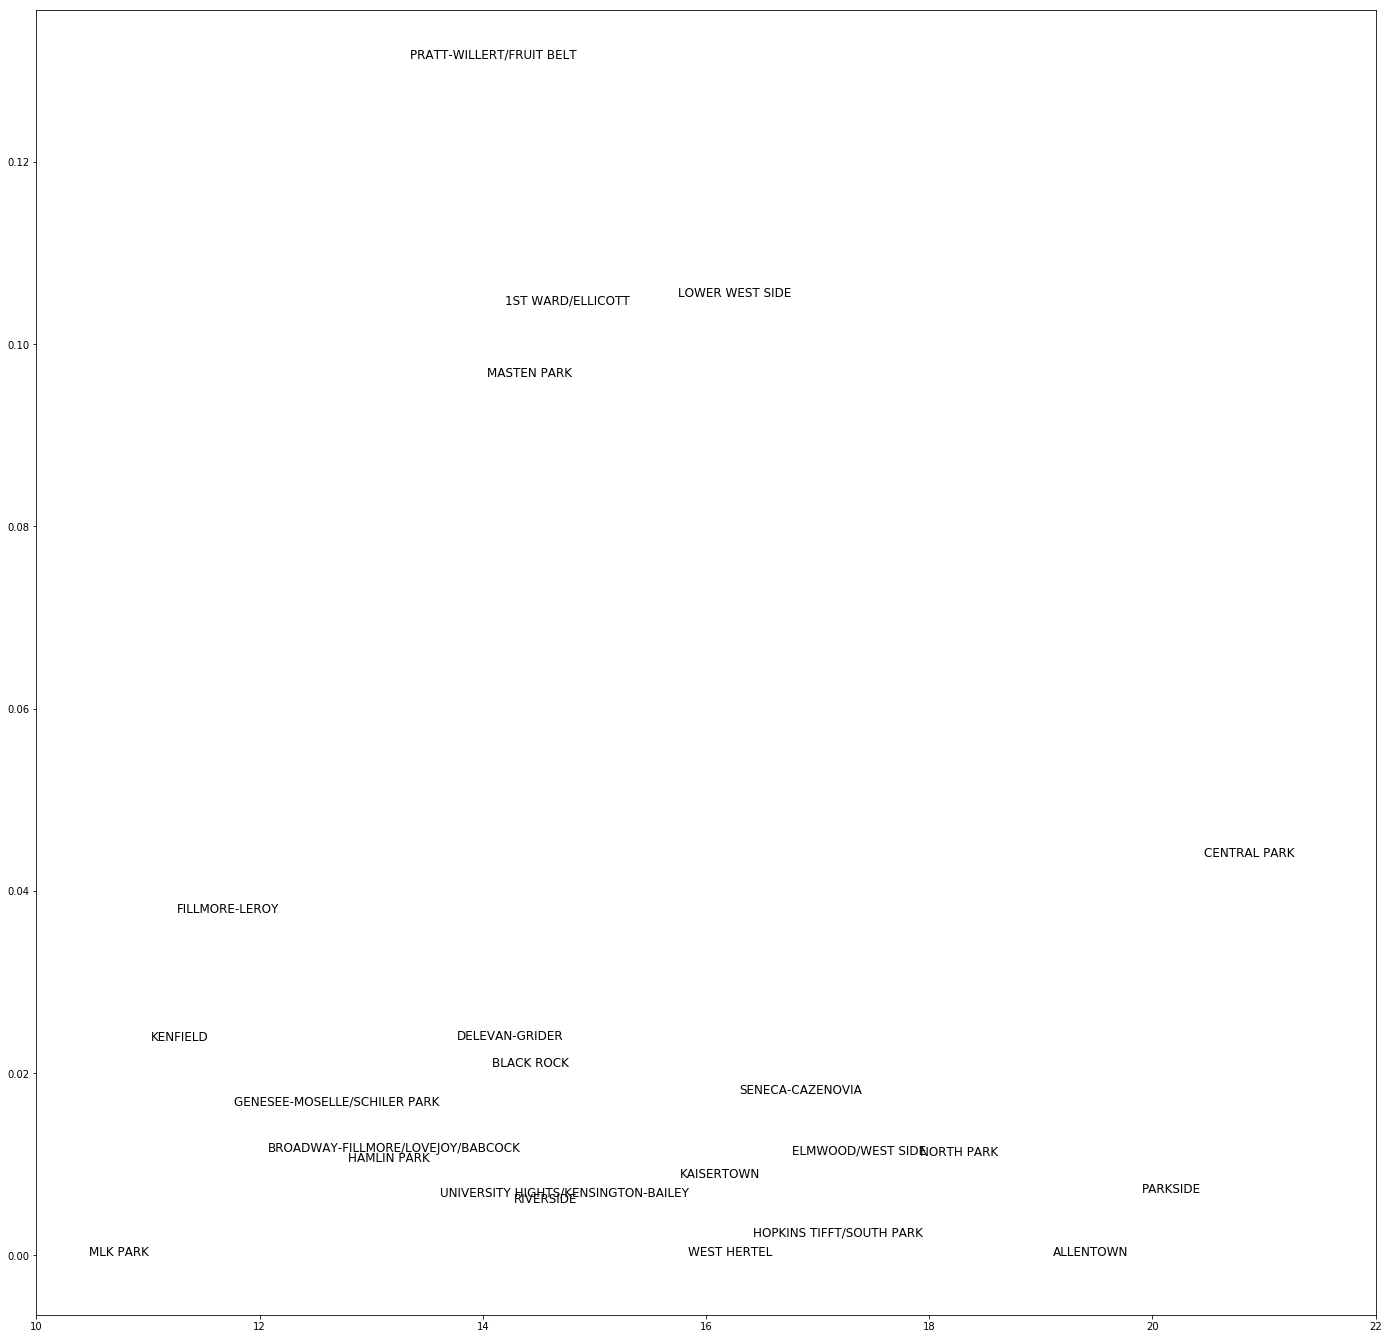

In [35]:
#new houses
scatterbasic(21,16)

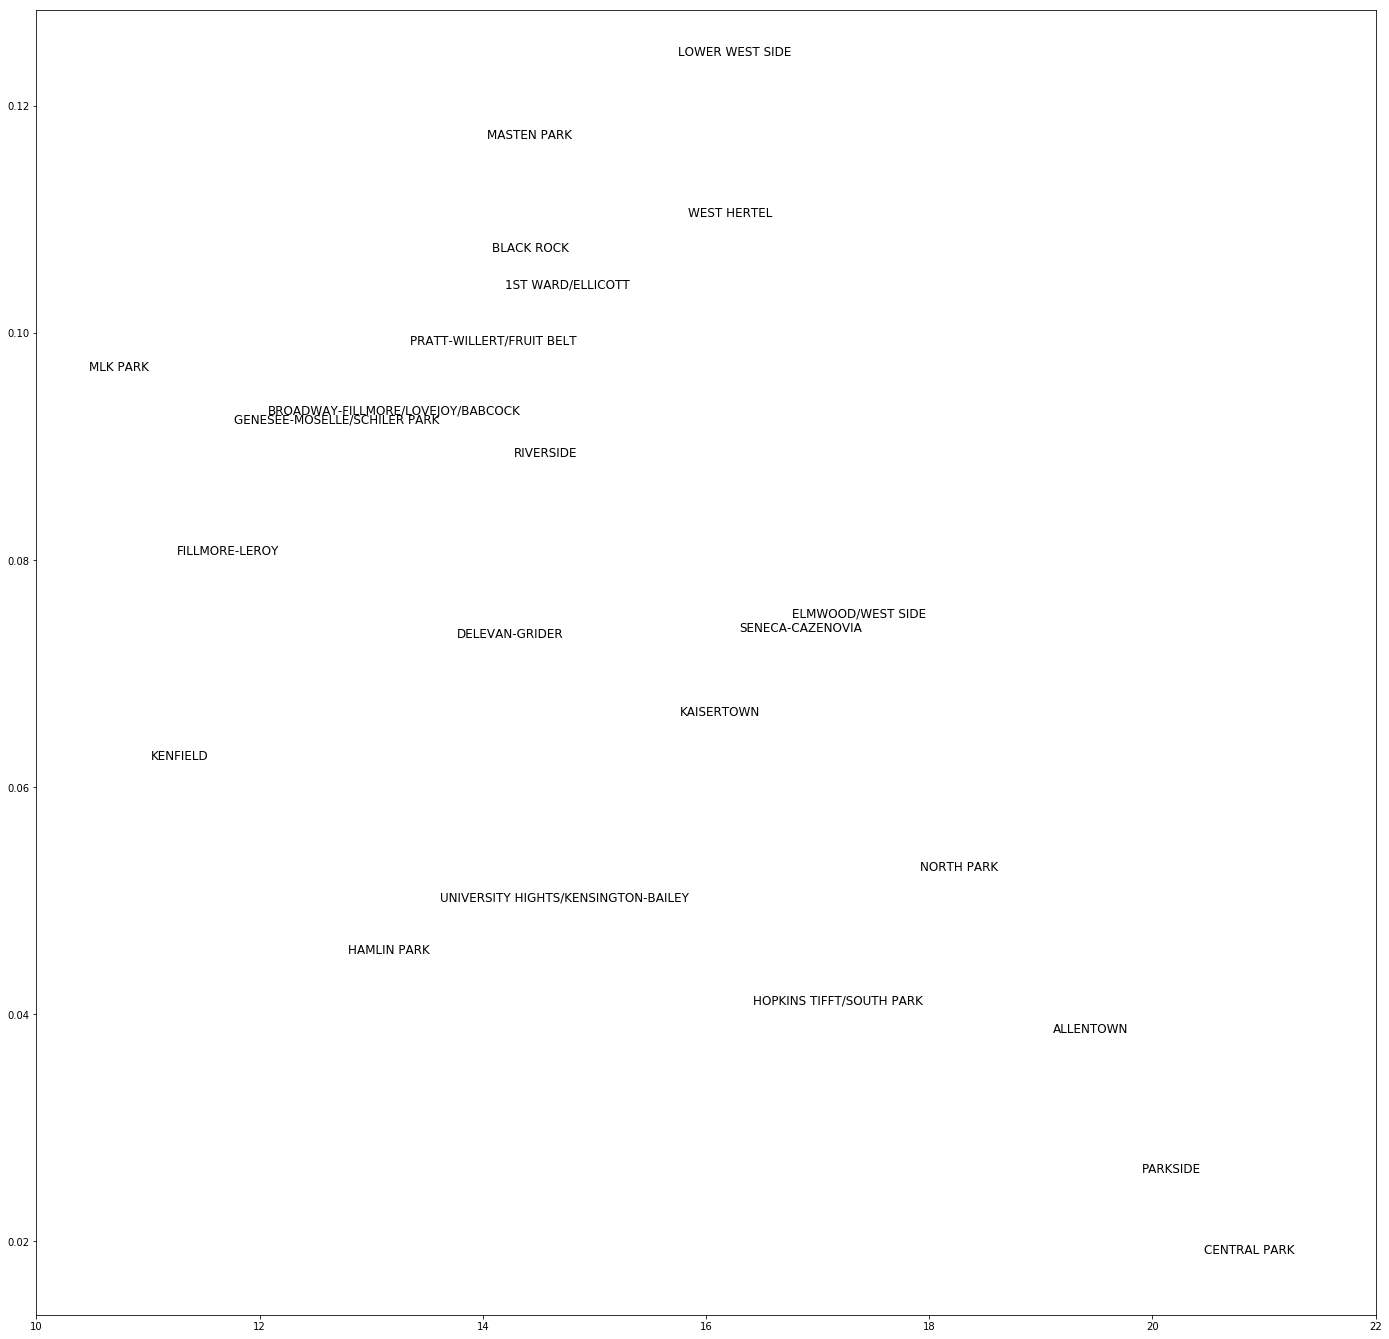

In [36]:
#no hs
scatterbasic(35, 0)

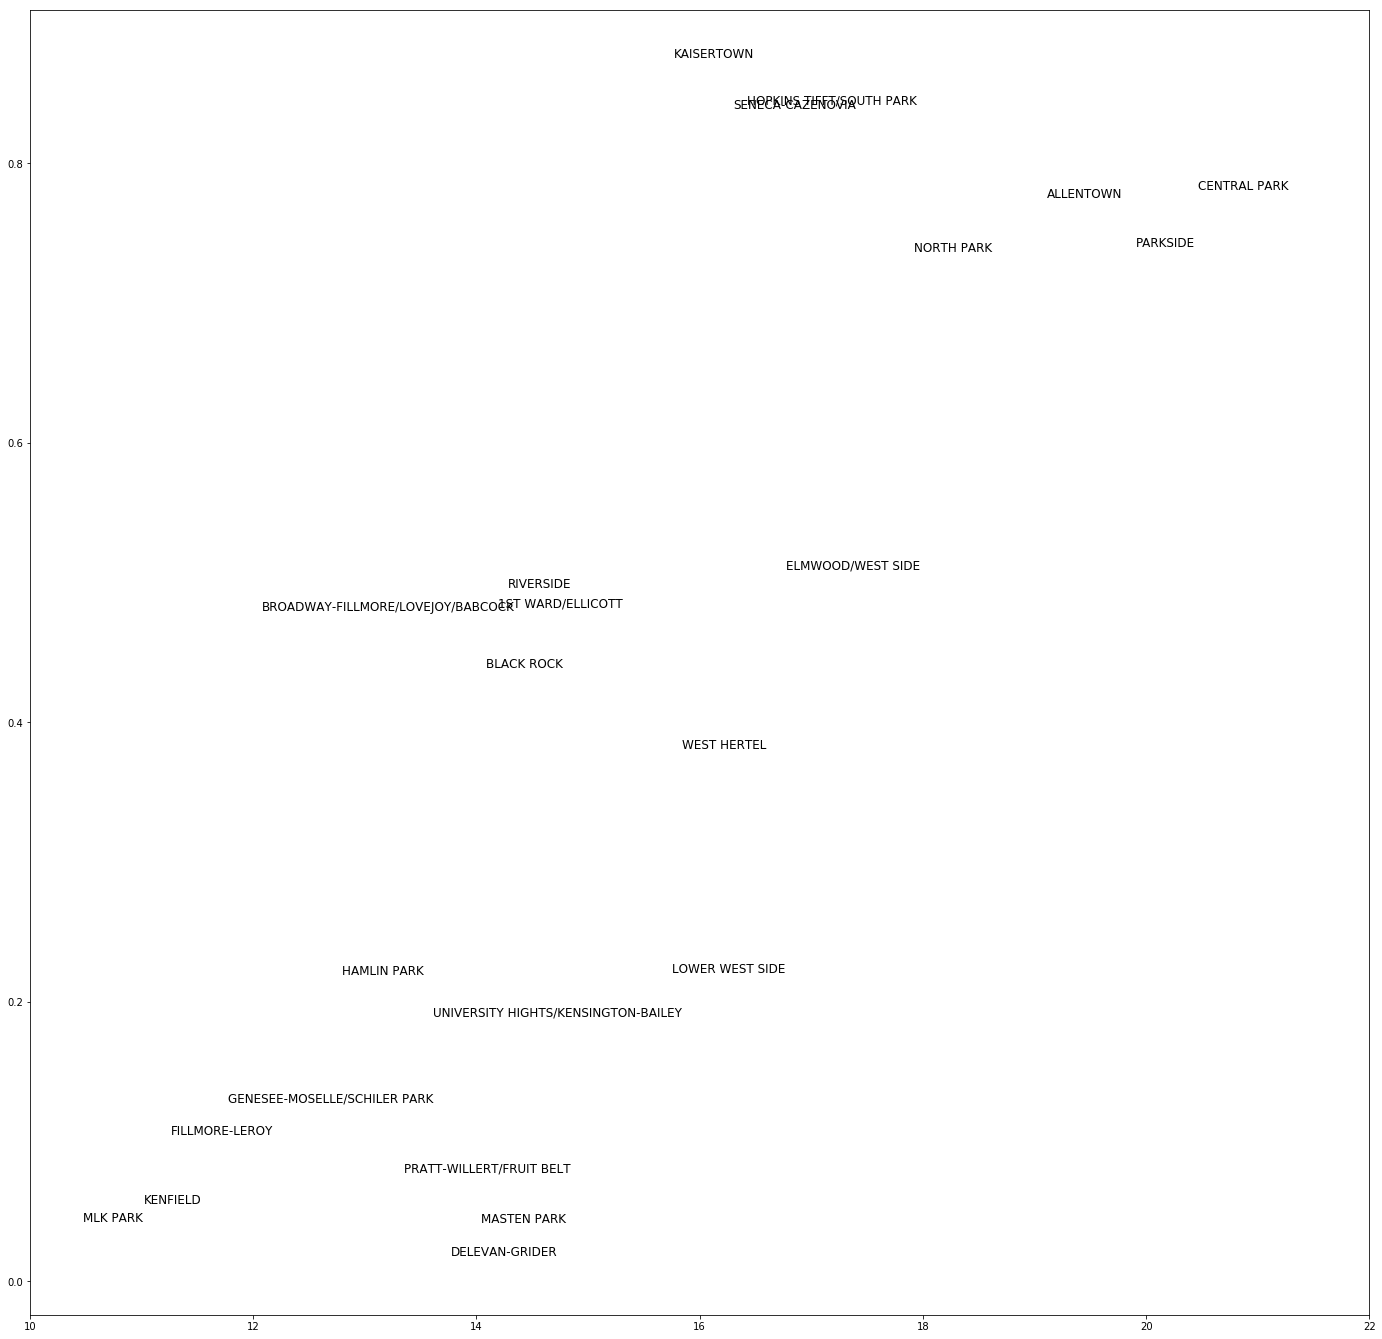

In [37]:
scatterbasic(7,0)

In [38]:
scatterbasic()

TypeError: scatterbasic() missing 2 required positional arguments: 'part' and 'whole'